Extablishing Twiiter Connection

In [8]:
import tweepy
import pandas as pd

api_key = 'yZ6E6wCJh5BpYD6hLSy07aesi'
api_key_secret = 's98RUSMsrwWNdzkhxMp2a1Jhawy2CYxLgHrFAEl8Itc3JbaGbN'

access_token = '1082021464986054657-BxSzIQDe1YPef2WPIsU5bijWbs5NBW'
access_token_secret = 'KfvBonYBQOArHZJkQ0vmcfmDIGne1QJf3LuRLucBY9uVe'

# authentication
auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

print("Successfully connected to the Twitter API.")

Successfully connected to the Twitter API.


Fetching Trends

In [ ]:
keyword = "ghana"
limit = 1000
trends = []

tweets = tweepy.Cursor(
        api.search_tweets, q=keyword, count=100, tweet_mode="extended", lang='en'
    ).items(limit)

trends.extend(tweets)


In [24]:
lists = []

for t in trends:
    lists.append([t.id_str, t.user.screen_name, t.full_text, t.created_at, t.lang, t.user.profile_image_url, t.user.name])

tweet_df = pd.DataFrame(lists)

In [25]:
columns = ["ID", "User", "Tweet_Text", "Date_Created", "Lang", "Profile_Pic", "Name"]
tweet_df.columns = columns
tweet_df.head()

,ID,User,Tweet_Text,Date_Created,Lang,Profile_Pic,Name
0,1559097380301070337,R_AMedia,#rugbyleague\nThe Middle East &amp; Africa (ME...,2022-08-15 08:39:16+00:00,en,http://pbs.twimg.com/profile_images/1547498947...,Rachel Ankomah Media
1,1559097359501598722,blacksperms_,RT @Amerado_Burner: The only peaceful rest is ...,2022-08-15 08:39:11+00:00,en,http://pbs.twimg.com/profile_images/1532653273...,BLACK SPERMS
2,1559097353965109248,NattyLeeCl,RT @the_marcoli_boy: Retweet my pinned tweet a...,2022-08-15 08:39:10+00:00,en,http://pbs.twimg.com/profile_images/1537019507...,🆑♥️♥️♥️
3,1559097339717062658,surr_mike,RT @DJ_Sydney_: Welcome to Ghana where basketb...,2022-08-15 08:39:07+00:00,en,http://pbs.twimg.com/profile_images/1553058048...,Free Spirit 🕊
4,1559097334927355904,Hambakubvu,@st_bourke @kiwiwayne2 Zero English in Africa?...,2022-08-15 08:39:05+00:00,en,http://pbs.twimg.com/profile_images/1483866452...,Fork Tailed Drongo


In [26]:
tweet_df.to_csv("tweets.csv", index=False)


First Five rows

In [27]:
df = pd.read_csv("tweets.csv")
df.head()

,ID,User,Tweet_Text,Date_Created,Lang,Profile_Pic,Name
0,1559097380301070337,R_AMedia,#rugbyleague\nThe Middle East &amp; Africa (ME...,2022-08-15 08:39:16+00:00,en,http://pbs.twimg.com/profile_images/1547498947...,Rachel Ankomah Media
1,1559097359501598722,blacksperms_,RT @Amerado_Burner: The only peaceful rest is ...,2022-08-15 08:39:11+00:00,en,http://pbs.twimg.com/profile_images/1532653273...,BLACK SPERMS
2,1559097353965109248,NattyLeeCl,RT @the_marcoli_boy: Retweet my pinned tweet a...,2022-08-15 08:39:10+00:00,en,http://pbs.twimg.com/profile_images/1537019507...,🆑♥️♥️♥️
3,1559097339717062658,surr_mike,RT @DJ_Sydney_: Welcome to Ghana where basketb...,2022-08-15 08:39:07+00:00,en,http://pbs.twimg.com/profile_images/1553058048...,Free Spirit 🕊
4,1559097334927355904,Hambakubvu,@st_bourke @kiwiwayne2 Zero English in Africa?...,2022-08-15 08:39:05+00:00,en,http://pbs.twimg.com/profile_images/1483866452...,Fork Tailed Drongo


Info

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            1000 non-null   int64 
 1   User          1000 non-null   object
 2   Tweet_Text    1000 non-null   object
 3   Date_Created  1000 non-null   object
 4   Lang          1000 non-null   object
 5   Profile_Pic   1000 non-null   object
 6   Name          1000 non-null   object
dtypes: int64(1), object(6)
memory usage: 54.8+ KB


In [29]:
df.isna().sum()

ID              0
User            0
Tweet_Text      0
Date_Created    0
Lang            0
Profile_Pic     0
Name            0
dtype: int64

In [30]:
df.Lang.unique().sum()

'en'

In [33]:
top_users = df[["Name"]].groupby(["Name"])["Name"].count().reset_index(name='count').sort_values(['count'], ascending=False).head(10)

top_users

,Name,count
236,Ghana Yesu ☦️,45
489,Rowland🤍,39
387,NATIONAL SERVICE SCHEME 🇬🇭,29
604,eGotickets,17
281,Jayke Computers,12
362,Marijke van der Lee,8
494,SAbali_Dreambig,8
365,Mau.re_en,7
452,Paradise (Out Now),6
574,WORLD MUSIC,5


In [43]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import gcf

fig = gcf()
fig.set_size_inches(18.5, 10.5, forward=True)

<Figure size 1332x756 with 0 Axes>

<BarContainer object of 10 artists>

c:\Users\BADASSOU MAWULI\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 129293 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\BADASSOU MAWULI\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 127468 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\BADASSOU MAWULI\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 127469 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\BADASSOU MAWULI\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 129293 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\Users\BADASSOU MAWULI\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 127468 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\Users\BADASSOU MAWULI\anaconda3\lib\site-packages\matplotlib\backends\b

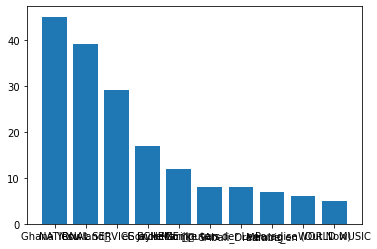

In [44]:
plt.bar(top_users["Name"], top_users["count"])

In [39]:
#import the library
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

#calculate the negative, positive, neutral and compound scores, plus verbal evaluation
def sentiment_vader(sentence):

    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()

    sentiment_dict = sid_obj.polarity_scores(sentence)

    if sentiment_dict['compound'] >= 0.05 :
        overall_sentiment = "Positive"

    elif sentiment_dict['compound'] <= - 0.05 :
        overall_sentiment = "Negative"

    else :
        overall_sentiment = "Neutral"
  
    return overall_sentiment

In [40]:
df["sentiment"] = df["Tweet_Text"].apply(lambda x: sentiment_vader(str(x)))

df.head()

,ID,User,Tweet_Text,Date_Created,Lang,Profile_Pic,Name,sentiment
0,1559097380301070337,R_AMedia,#rugbyleague\nThe Middle East &amp; Africa (ME...,2022-08-15 08:39:16+00:00,en,http://pbs.twimg.com/profile_images/1547498947...,Rachel Ankomah Media,Positive
1,1559097359501598722,blacksperms_,RT @Amerado_Burner: The only peaceful rest is ...,2022-08-15 08:39:11+00:00,en,http://pbs.twimg.com/profile_images/1532653273...,BLACK SPERMS,Positive
2,1559097353965109248,NattyLeeCl,RT @the_marcoli_boy: Retweet my pinned tweet a...,2022-08-15 08:39:10+00:00,en,http://pbs.twimg.com/profile_images/1537019507...,🆑♥️♥️♥️,Positive
3,1559097339717062658,surr_mike,RT @DJ_Sydney_: Welcome to Ghana where basketb...,2022-08-15 08:39:07+00:00,en,http://pbs.twimg.com/profile_images/1553058048...,Free Spirit 🕊,Neutral
4,1559097334927355904,Hambakubvu,@st_bourke @kiwiwayne2 Zero English in Africa?...,2022-08-15 08:39:05+00:00,en,http://pbs.twimg.com/profile_images/1483866452...,Fork Tailed Drongo,Negative


In [41]:
import seaborn as sns

c:\Users\BADASSOU MAWULI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sentiment', ylabel='count'>

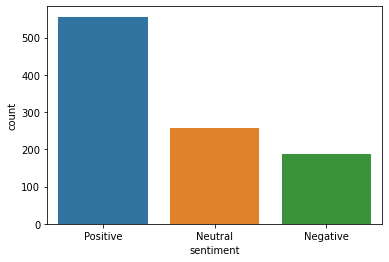

In [42]:
sns.countplot(df["sentiment"])

More positive tweets having "ghana" as a keyword in it